## Dependencies

In [60]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

## Reading Dataframes

In [62]:
TRAIN_CSV = '../Dataset/train.csv'
TEST_CSV = '../Dataset/test.csv'

In [63]:
df = pd.read_csv(TRAIN_CSV)
df.drop(columns=['Unnamed: 0','id'], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Preprocessing

## Handle Missing Values

In [64]:
print(df.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


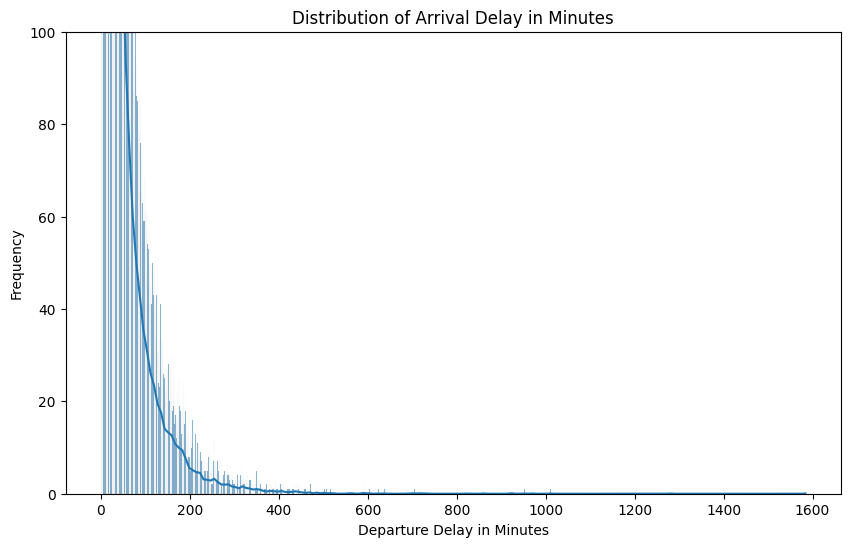

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Arrival Delay in Minutes'], kde=True)  
plt.title('Distribution of Arrival Delay in Minutes')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

In [66]:
#! handle the missing arrival delay values based on departure delays
target_column = 'Arrival Delay in Minutes'
feature_column = 'Departure Delay in Minutes'
imputer = IterativeImputer(max_iter=200, random_state=42)
df_copy=df.copy()
df_copy.drop(columns=['satisfaction'], inplace=True)
df_filled = df_copy[[target_column, feature_column]].dropna(subset=[feature_column])
df_filled[[target_column, feature_column]] = imputer.fit_transform(df_filled[[target_column, feature_column]])
df_filled.head()

,Arrival Delay in Minutes,Departure Delay in Minutes
0,18.0,25.0
1,6.0,1.0
2,0.0,0.0
3,9.0,11.0
4,0.0,0.0


In [67]:
df_copy[target_column] = df_filled[target_column]
df_copy.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,1,3,4,4,4,4,1,0,0.0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,3,3,4,3,5,2,9,23.0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,4,5,4,4,0.0
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,3,1,1,2,1,4,1,2,0,0.0
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,3,2,2,3,4,4,3,2,0,0.0


## Handle Correalted features

In [68]:
#! apply one hot encoding to categorical string features
df_encoded = pd.get_dummies(df_copy)
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,18.0,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,6.0,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,9.0,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,0.0,False,True,True,False,True,False,True,False,False


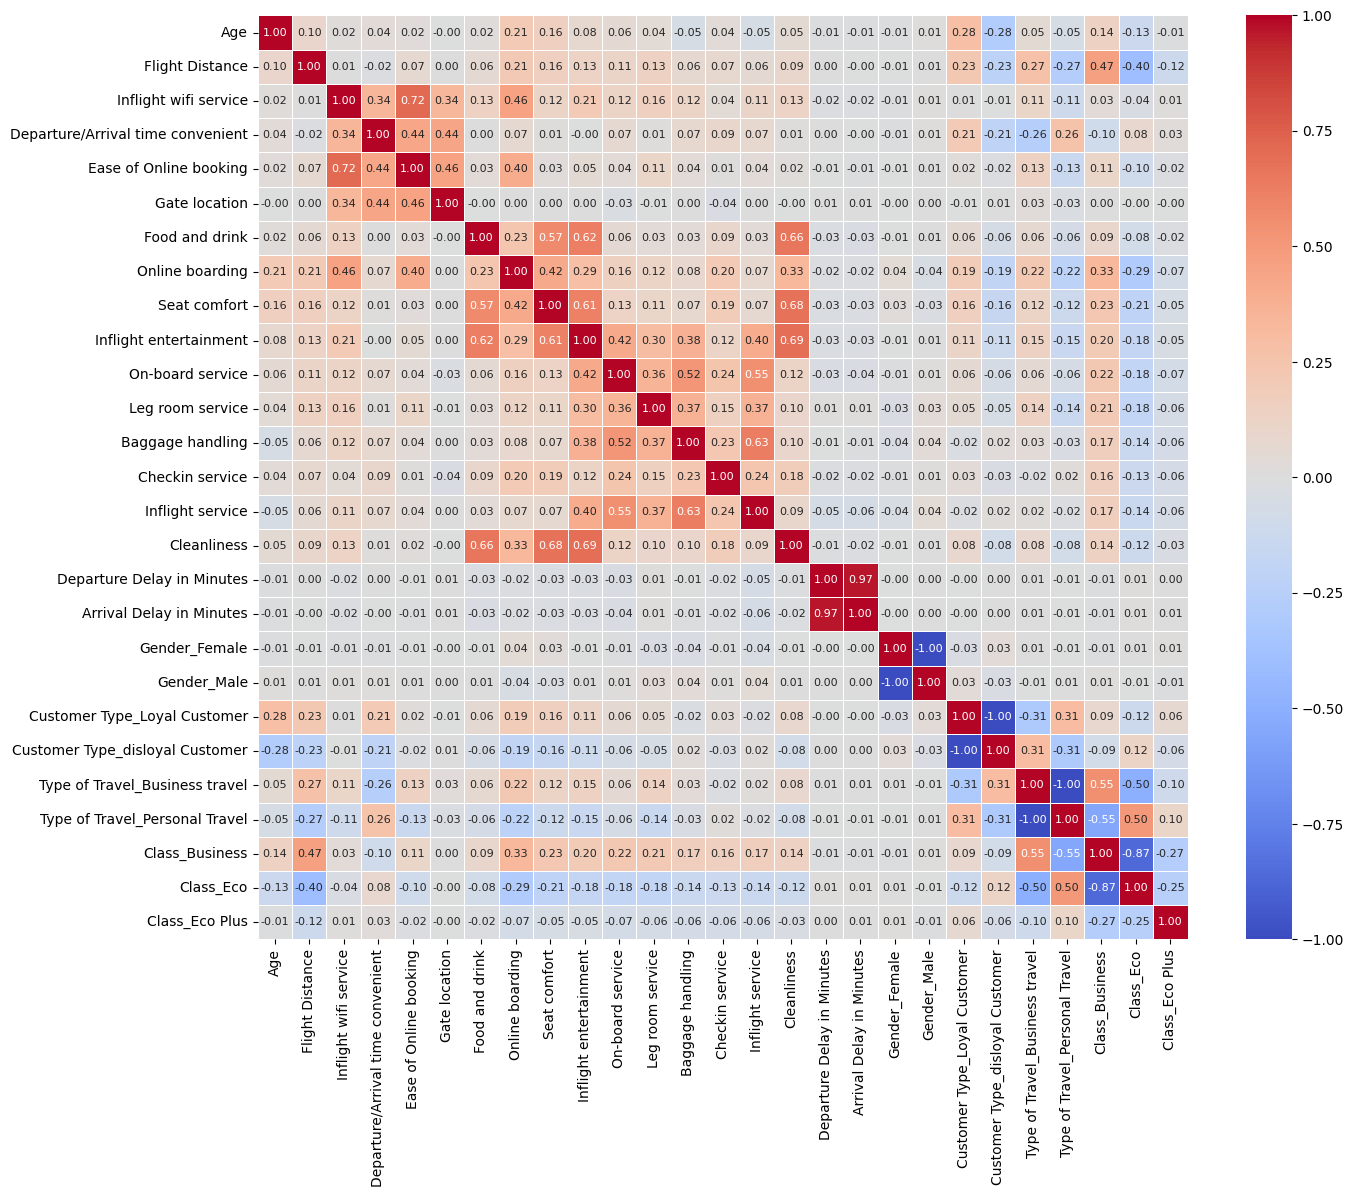

In [69]:
#! get correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.show()

In [70]:
#! it's clear that Arrival and DEaprture delay are highly correlated sop drop arrival delay
df_encoded.drop(columns=['Arrival Delay in Minutes'], inplace=True)
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,1,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,0,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,11,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,0,False,True,True,False,True,False,True,False,False


## Remove Outliers

In [71]:
numerical_df = df_encoded.select_dtypes(include=[np.number])
cov_matrix = numerical_df.cov()
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vector = np.mean(numerical_df, axis=0)
mahalanobis_distances = numerical_df.apply(
    lambda row: mahalanobis(row, mean_vector, inv_cov_matrix), axis=1
)
threshold = chi2.ppf(0.95, df=numerical_df.shape[1])
outliers = mahalanobis_distances > threshold
outliers.sum()

2

In [72]:
df_no_outliers = df_encoded[~outliers]
print("Number of rows after removing outliers:", df_no_outliers.shape[0])
df_no_outliers.head()

Number of rows after removing outliers: 103902


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,1,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,0,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,11,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,0,False,True,True,False,True,False,True,False,False


## Save Modified Data and Labels

In [73]:
train_df = df_no_outliers
train_df['satisfaction'] = df[~outliers]['satisfaction'].replace({
    'satisfied': True,
    'neutral or dissatisfied': False
})
train_df.head()

C:\Users\omara\AppData\Local\Temp\ipykernel_13108\4044438227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['satisfaction'] = df[~outliers]['satisfaction'].replace({
C:\Users\omara\AppData\Local\Temp\ipykernel_13108\4044438227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['satisfaction'] = df[~outliers]['satisfaction'].replace({


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,False,True,True,False,False,True,False,False,True,False
1,25,235,3,2,3,3,1,3,1,1,...,False,True,False,True,True,False,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,True,False,True,False,True,False,True,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,True,False,True,False,True,False,True,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,False,True,True,False,True,False,True,False,False,True


In [74]:
train_df.to_csv('../Dataset/train_cleaned.csv', index=False)